Построение гистограммы выборки размера 1000 из экспоненциального распределения и теоретической плотности экспоненциального распределения

Теоретическая плотность экспоненциального распределения

$f(x)=\lambda e^{-\lambda x}$  при $x\geq 0$

$f(x)=0$  при $x<0$

выбранное значение $\lambda=0.33$

Text(0.5,1,'Exponential PDF ($\\exp_{0.33}$)')

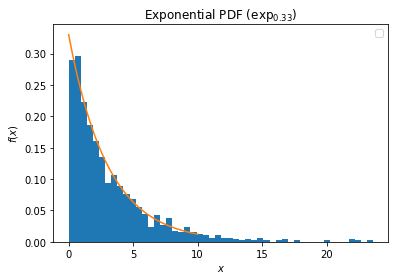

In [110]:
import re
import math
import numpy as np
import scipy as sp
from matplotlib import pylab as plt
import scipy.stats as sts

lmbd=0.33
x = np.linspace(0,10,100)
rv = sts.expon(scale=1/lmbd)
sample=rv.rvs(size=1000)
plt.hist(sample,bins=50,normed=True)
plt.ylabel('$f(x)$')
plt.xlabel('$x$')
plt.legend(loc='upper left')

x = np.linspace(0,10,100)
pdf = rv.pdf(x)
plt.plot(x, pdf)
plt.legend()
plt.title("Exponential PDF ($\exp_{%s}$)" % lmbd)





Для экспоненциалного распределения с парметром $\lambda$ значения матожидания и диспресии следующие 

$EX=\frac{1}{\lambda}$, $DX=\frac{1}{\lambda^2 }$

Согласно центрально-предельной теореме  выборочное среднее имеет  нормальное распределение с параметрами $(\mu=EX,\sigma^2=\frac{DX}{n})$

При различных значениях n (5, 10, 100) генерируем 1000 выборок объёма n и строим гистограммы распределений их выборочных средних. Поверх каждой гистограммы рисуем плотность нормального распределения с параметрами $\mu=\frac{1}{\lambda}$, $\sigma^2=\frac{1}{\lambda^2 n}$

$\sigma=\frac{1}{\lambda \sqrt {n}}$

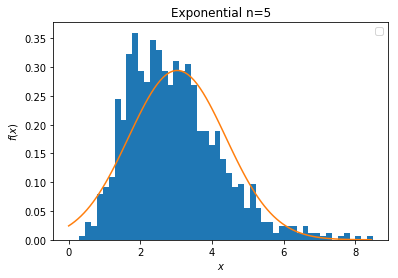

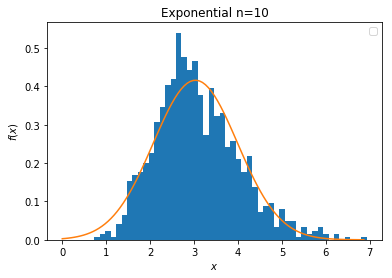

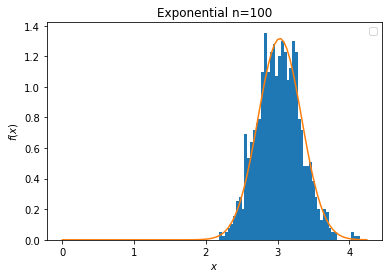

In [107]:

mu = 1./lmbd


for n in [5,10,100]:
    sample_mean=list()
    for i in range(1000):
        sample_temp=rv.rvs(size=n)
        sample_mean.append(np.mean(sample_temp))
    
    plt.figure()
    plt.hist(sample_mean,bins=50,normed=True)
    plt.title("Exponential n=%s"% n)
    
    sigma = 1./lmbd/math.sqrt(n)
    norm_rv = sts.norm(loc=mu, scale=sigma)
    x = np.linspace(0,mu+4*sigma,100)
    pdf = norm_rv.pdf(x)
    plt.legend()
    plt.plot(x, pdf,label="theoretical pdf")
    plt.ylabel('$f(x)$')
    plt.xlabel('$x$')

# Вывод:
При увеличении n гистограмма распределения выборочного среднего экспоненциального распределения стремится к плотности нормального распределения с параметрами $\mu=\frac{1}{\lambda}$, $\sigma^2=\frac{1}{\lambda^2 n}$

Также с увеличением n уходит скошенность гистограммы